In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('/content/Akshata Choukimath - iris.csv - Akshata Choukimath - iris.csv.csv')

In [4]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
# split the data into features and labels

X = df[['sepal.length',	'sepal.width',	'petal.length',	'petal.width']]
Y = df[['variety']]



In [8]:

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


In [9]:
# features are columns from x_std
features = X_std.T 
covariance_matrix = np.cov(features)
print('COV_MAT\n',covariance_matrix)




COV_MAT
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [10]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
print('\nHighest(%) varying EigenValue\n',eig_vals[0] / sum(eig_vals))

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]

Highest(%) varying EigenValue
 0.729624454132999


In [11]:
projected_X = X_std.dot(eig_vecs.T[0])
print(projected_X)

[-2.26470281 -2.08096115 -2.36422905 -2.29938422 -2.38984217 -2.07563095
 -2.44402884 -2.23284716 -2.33464048 -2.18432817 -2.1663101  -2.32613087
 -2.2184509  -2.6331007  -2.1987406  -2.26221453 -2.2075877  -2.19034951
 -1.898572   -2.34336905 -1.914323   -2.20701284 -2.7743447  -1.81866953
 -2.22716331 -1.95184633 -2.05115137 -2.16857717 -2.13956345 -2.26526149
 -2.14012214 -1.83159477 -2.61494794 -2.44617739 -2.10997488 -2.2078089
 -2.04514621 -2.52733191 -2.42963258 -2.16971071 -2.28647514 -1.85812246
 -2.5536384  -1.96444768 -2.13705901 -2.0697443  -2.38473317 -2.39437631
 -2.22944655 -2.20383344  1.10178118  0.73133743  1.24097932  0.40748306
  1.0754747   0.38868734  0.74652974 -0.48732274  0.92790164  0.01142619
 -0.11019628  0.44069345  0.56210831  0.71956189 -0.0333547   0.87540719
  0.35025167  0.15881005  1.22509363  0.1649179   0.73768265  0.47628719
  1.2341781   0.6328582   0.70266118  0.87427365  1.25650912  1.35840512
  0.66480037 -0.04025861  0.13079518  0.02345269  0.

In [12]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

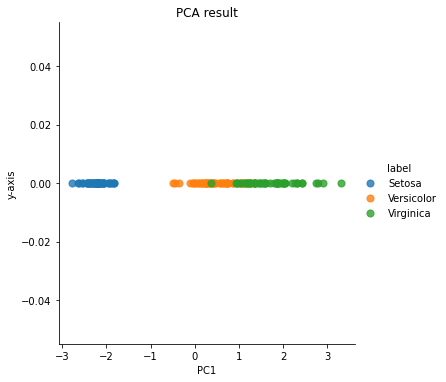

In [13]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

In [14]:
# PCA using built-in function from sklearn

from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(X_std)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


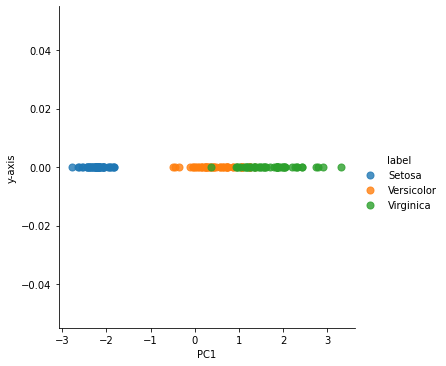

In [15]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color